## Observations and Insights

*The highest mouse survival rate was with the Capomulin regimen at around 84%, while the Propriva regimen had the lowest mouse survival rate at around 28% by day 45 of time period. 

*The top four regimens produced consistent results due to the fact there was only 1 outlier among them

*The correlation coefficient between mouse weight and avergae tumor volume was positive for the Capomulin regimen at 0.84. 

*Capomulin was an effective treatment regimen that decreased tumor volume consistently. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Create reference for calcualtions later on
study_df = pd.DataFrame(combined_df)
study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics
* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
#Generate sumamry the summary table with desired values for each regimen
sum_table = pd.DataFrame(combined_df.groupby("Drug Regimen").count())

sum_table["Mean Tumor Volume"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
sum_table["Median Tumor Volume"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
sum_table["Tumor Volume Variance"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
sum_table["Tumor Volume Std. Dev."] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sum_table["Tumor Volume Std. Err."] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
sum_table = sum_table[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]]

sum_table.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots
* Generate a bar plot showing number of data points for each treatment regimen using pandas

* Generate a bar plot showing number of data points for each treatment regimen using pyplot

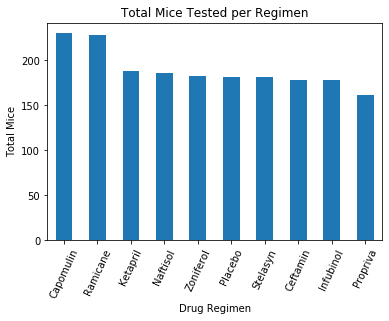

<Figure size 864x360 with 0 Axes>

In [4]:
#Using pandas to create a bar plot to display number of data points for each treatment regimen 

reg_df = study_df['Drug Regimen'].value_counts()
reg_df.head()

reg_df.plot(kind='bar')
plt.title("Total Mice Tested per Regimen")
plt.ylabel("Total Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=65)
plt.figure(figsize=(12,5))


plt.show()

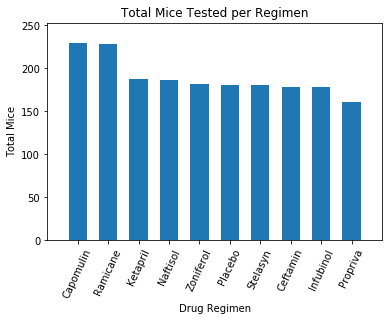

In [5]:
#Using Matplotlib's pyplot create a bar plot to display number of data points for each treatment regimen 

plt.bar(range(len(reg_df)),reg_df,width=0.6)
plt.xticks(range(len(reg_df)),reg_df.index, rotation = 65)

plt.xlim(-1,len(reg_df))
plt.ylim(0,reg_df.max()*1.1)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.title("Total Mice Tested per Regimen")


plt.show()

## Pie plots
* Generate a pie plot showing the distribution of female versus male mice using pandas

* Generate a pie plot showing the distribution of female versus male mice using pyplot


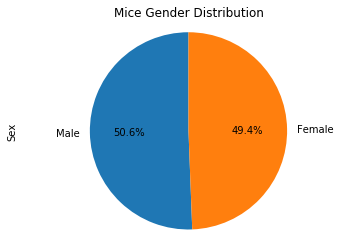

In [6]:
#With pandas create a pie plot showing the distribution of female versus male mice 

gen_df = study_df["Sex"].value_counts()

gen_df.plot(kind="pie", autopct = "%1.1f%%", startangle = 90, title = "Mice Gender Distribution")

plt.axis("equal")

plt.title("Mice Gender Distribution")

plt.show()

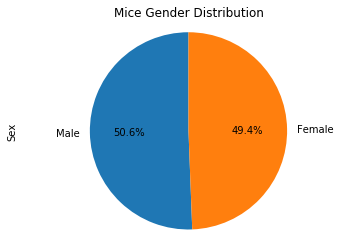

In [7]:
#With pyplot create a pie plot shwoing the distribution of female versus male mice 

plt.pie(gen_df, labels = gen_df.index, autopct = "%1.1f%%", startangle = 90)

plt.axis("equal")

plt.ylabel("Sex")

plt.title("Mice Gender Distribution")

plt.show()


## Quartiles, outliers and boxplots
* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

* Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [13]:
#Caculate and print outliers with IQR, boundaries, and number of outliers
pop_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Set the index 
index_df = combined_df.set_index('Drug Regimen')

regimens_df = index_df.loc[pop_regimens, :]

#Group the four regimens by Mouse ID and mark the final timepoint
pop_regimens_df = regimens_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == regimens_df['Timepoint']

timepoint_df = regimens_df[pop_regimens_df]

#Get the quartiles of the final tumor volumes of each regimen 
quartiles = timepoint_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
q_df = pd.DataFrame(quartiles)

# Loop through regimes to determine the IQR, any potential outliers, and the outlier boundaries

for regimen in pop_regimens:
    lowerq = q_df.loc[(regimen, 0.25), 'Tumor Volume (mm3)']
    upperq = q_df.loc[(regimen, 0.75), 'Tumor Volume (mm3)']
    iqr = round(upperq - lowerq, 2)    
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    print(f'The IQR for {regimen} is {iqr}')
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    treatments_df = timepoint_df.loc[regimen]
    outliers = treatments_df.loc[(treatments_df['Tumor Volume (mm3)'] > upper_bound) | 
                              (treatments_df['Tumor Volume (mm3)'] < lower_bound)]
    print(f'Number of outliers: {len(outliers)}\n')

The IQR for Capomulin is 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Number of outliers: 0

The IQR for Ramicane is 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Number of outliers: 0

The IQR for Infubinol is 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Number of outliers: 1

The IQR for Ceftamin is 15.58
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
Number of outliers: 0



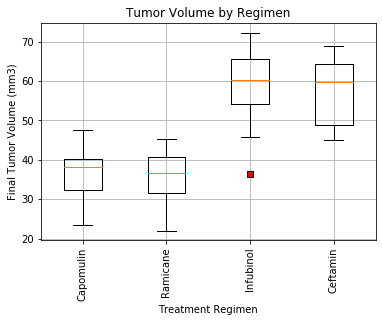

In [14]:
#filter data to get a reduced dataframe of only relavant data needed

reduced_df = study_df.groupby("Mouse ID").max()[["Drug Regimen","Timepoint"]]

#create empty list to hold result after loop
final_tumor_vol = []

for mouse in reduced_df.index:
    new_df = study_df[study_df["Mouse ID"] == mouse]
    new_df = new_df[new_df["Timepoint"] == reduced_df.loc[mouse]["Timepoint"]]
    final_tumor_vol.append(new_df["Tumor Volume (mm3)"].sum())

reduced_df["Final Tumor Volume (mm3)"] = final_tumor_vol

#create empty list for summary dataframe that will help generate box plot
tv_dict = {}

#Obtain final tumor volume for each treatment regimen
tv_dict["Capomulin"] = list(reduced_df[reduced_df["Drug Regimen"] == "Capomulin"]["Final Tumor Volume (mm3)"])
tv_dict["Ramicane"] = list(reduced_df[reduced_df["Drug Regimen"] == "Ramicane"]["Final Tumor Volume (mm3)"])
tv_dict["Infubinol"] = list(reduced_df[reduced_df["Drug Regimen"] == "Infubinol"]["Final Tumor Volume (mm3)"])
tv_dict["Ceftamin"] = list(reduced_df[reduced_df["Drug Regimen"] == "Ceftamin"]["Final Tumor Volume (mm3)"])

final_tumor_df = pd.DataFrame(tv_dict)

#Generate the box plot of final tumor volume of each mouse across the four regimens 

red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.boxplot(final_tumor_df.T, flierprops = red_square )
plt.xticks(range(1,len(final_tumor_df.columns)+1),final_tumor_df.columns, rotation = 90)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")
plt.title("Tumor Volume by Regimen")
plt.grid()
plt.show()   




## Line and Scatter Plots

* Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Text(0, 0.5, 'Tumor Volume (mm3)')

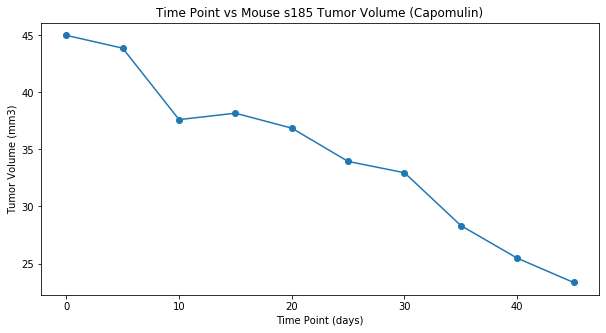

In [18]:
#Obtain Capomulin treatment data
capomulin_data = study_df.loc[study_df["Drug Regimen"] == "Capomulin"]

s185 = capomulin_data.loc[capomulin_data["Mouse ID"]== "s185"]

plt.figure(figsize = (10,5))

#Create the line plot 
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], marker = "o")

plt.title("Time Point vs Mouse s185 Tumor Volume (Capomulin)")

plt.xlabel("Time Point (days)")

plt.ylabel("Tumor Volume (mm3)")



Text(0.5, 1.0, 'Mouse Tumor Volume vs Weight (Capomulin)')

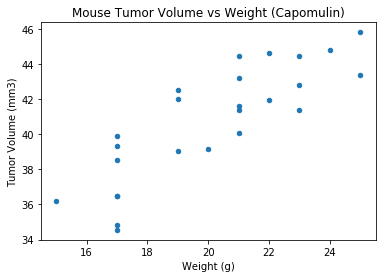

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for Capomulin regimen

cap_avg = capomulin_data.groupby("Mouse ID").mean()

cap_avg.plot.scatter("Weight (g)","Tumor Volume (mm3)")

plt.title("Mouse Tumor Volume vs Weight (Capomulin)")

The correlation coeffiecient between mouse weight and average tumor volume is 0.84


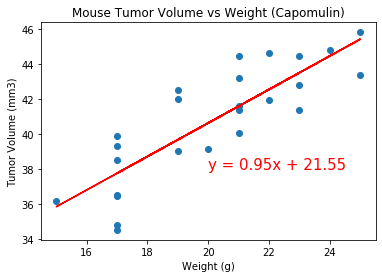

In [31]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

tum_vol= cap_avg["Tumor Volume (mm3)"]
weight = cap_avg["Weight (g)"]
correlation = st.pearsonr(tum_vol,weight)

#calculate correaltion coefficent 
print(f"The correlation coeffiecient between mouse weight and average tumor volume is {round(correlation[0],2)}")

#calcualte line regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tum_vol)

lin_regress = weight * slope + intercept

linear_reg_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Generate your scatter plot with linear regression model over plot
plt.scatter(weight,tum_vol)
plt.plot(weight,lin_regress,"r-")
plt.title("Mouse Tumor Volume vs Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(linear_reg_equ,(20,38),fontsize=15,color="red")

plt.show()


